# **Data Cleaning and EDA of WW2 Weather dataset**
## **-by AFZAL**

### About Weather Conditions in World War Two dataset

    The data is taken from the United States National Oceanic and Atmospheric Administration https://www.kaggle.com/noaa
    National Centres for Environmental Information website:
    https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

#### Content:
    The dataset contains information on weather conditions recorded on each day at various weather stations around the world.
    Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions. 

    target variable:'MinTemp'

### Importing libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import matplotlib.style as style
style.use("seaborn-darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [144]:
# importing data
df=pd.read_csv('WW2 Weather.csv', parse_dates=['Date'])
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-07-01,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-07-02,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-07-03,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-07-04,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-07-05,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic info

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STA          119040 non-null  int64         
 1   Date         119040 non-null  datetime64[ns]
 2   Precip       119040 non-null  object        
 3   WindGustSpd  532 non-null     float64       
 4   MaxTemp      119040 non-null  float64       
 5   MinTemp      119040 non-null  float64       
 6   MeanTemp     119040 non-null  float64       
 7   Snowfall     117877 non-null  object        
 8   PoorWeather  34237 non-null   object        
 9   YR           119040 non-null  int64         
 10  MO           119040 non-null  int64         
 11  DA           119040 non-null  int64         
 12  PRCP         117108 non-null  object        
 13  DR           533 non-null     float64       
 14  SPD          532 non-null     float64       
 15  MAX          118566 non-null  floa

### ***There are a lot of features with more than 50% missing values***

### Removing features with high missing values

In [117]:
# getting null value count in each feature
null_count=df.isnull().sum()

# converting to percentage of values missing
null_count=null_count*100/df.shape[0]

# getting list of useless columns
useless_columns= list( null_count[null_count>50].index )

useless_columns

['WindGustSpd',
 'PoorWeather',
 'DR',
 'SPD',
 'SND',
 'FT',
 'FB',
 'FTI',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [118]:
# dropping useless columns
df.drop(columns=useless_columns, axis=1, inplace=True)

In [119]:
# checking again for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117877 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 13.6+ MB


In [120]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

    There are features with some missing values.
    We can try to impute those values.

### Data dictionary
    Lets check out the data dictionary for the remaining features 

In [121]:
pd.read_csv('data_dict.csv', index_col='Feature')

,Description
Feature,
STA,Weather Station
Date,Date
Precip,Precipitation in mm
MaxTemp,Maximum temperature in degrees Celsius
MinTemp,Minimum temperature in degrees Celsius
MeanTemp,Mean temperature in degrees Celsius
Snowfall,Snowfall and Ice Pellets in mm
YR,Year of Observation
MO,Month of Observation


### ***Looks like 5 features are repeating (represented with different units)*** 
### ***Lets drop these repeating features that also have a few missing values***

In [122]:
df.drop(columns=['PRCP','MAX','MIN','MEA','SNF'], axis=1, inplace=True)

In [123]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5


In [124]:
# checking again for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 9.1+ MB


    Looks like Precip and Snowfall are numerical columns but stored as object 
    So lets convert them to float64

#### **df[['Precip', 'Snowfall']].astype(np.float64)**
    Running the above command gives an error

#### **ValueError: could not convert string to float: 'T'**
    
    Seems like there is a string value in the feature

### Handling snowfall feature

In [125]:
df.Snowfall.value_counts()

0.0        86090
0          29600
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
48.26         22
2.54          22
35.56         20
33.02         15
60.96         13
7.62          11
38.1          11
66.04         11
53.34         10
43.18         10
10.16         10
63.5           7
5.08           7
55.88          6
40.64          6
76.2           5
58.42          5
15.24          4
81.28          4
78.74          2
12.7           2
83.82          1
68.58          1
86.36          1
73.66          1
Name: Snowfall, dtype: int64

    We found that '#VALUE!' was a value in Snowfall that was non numerical and hence whole Snowfall feature became object

In [126]:
# replacing '#VALUE!' with np.nan for easier processing
df.Snowfall=df.Snowfall.replace('#VALUE!', np.nan).astype('float64')

### handling Precip feature

In [127]:
df.Precip.value_counts()

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: Precip, Length: 540, dtype: int64

    We found that 'T' was a value in Precip that was non numerical and hence whole Precip feature became object

In [128]:
# replacing 'T' with np.nan
df.Precip=df.Precip.replace('T', np.nan).astype('float64')

### Now our data has been converted to numerical

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    102287 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117833 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 9.1 MB


### Lets have a look at the distributions

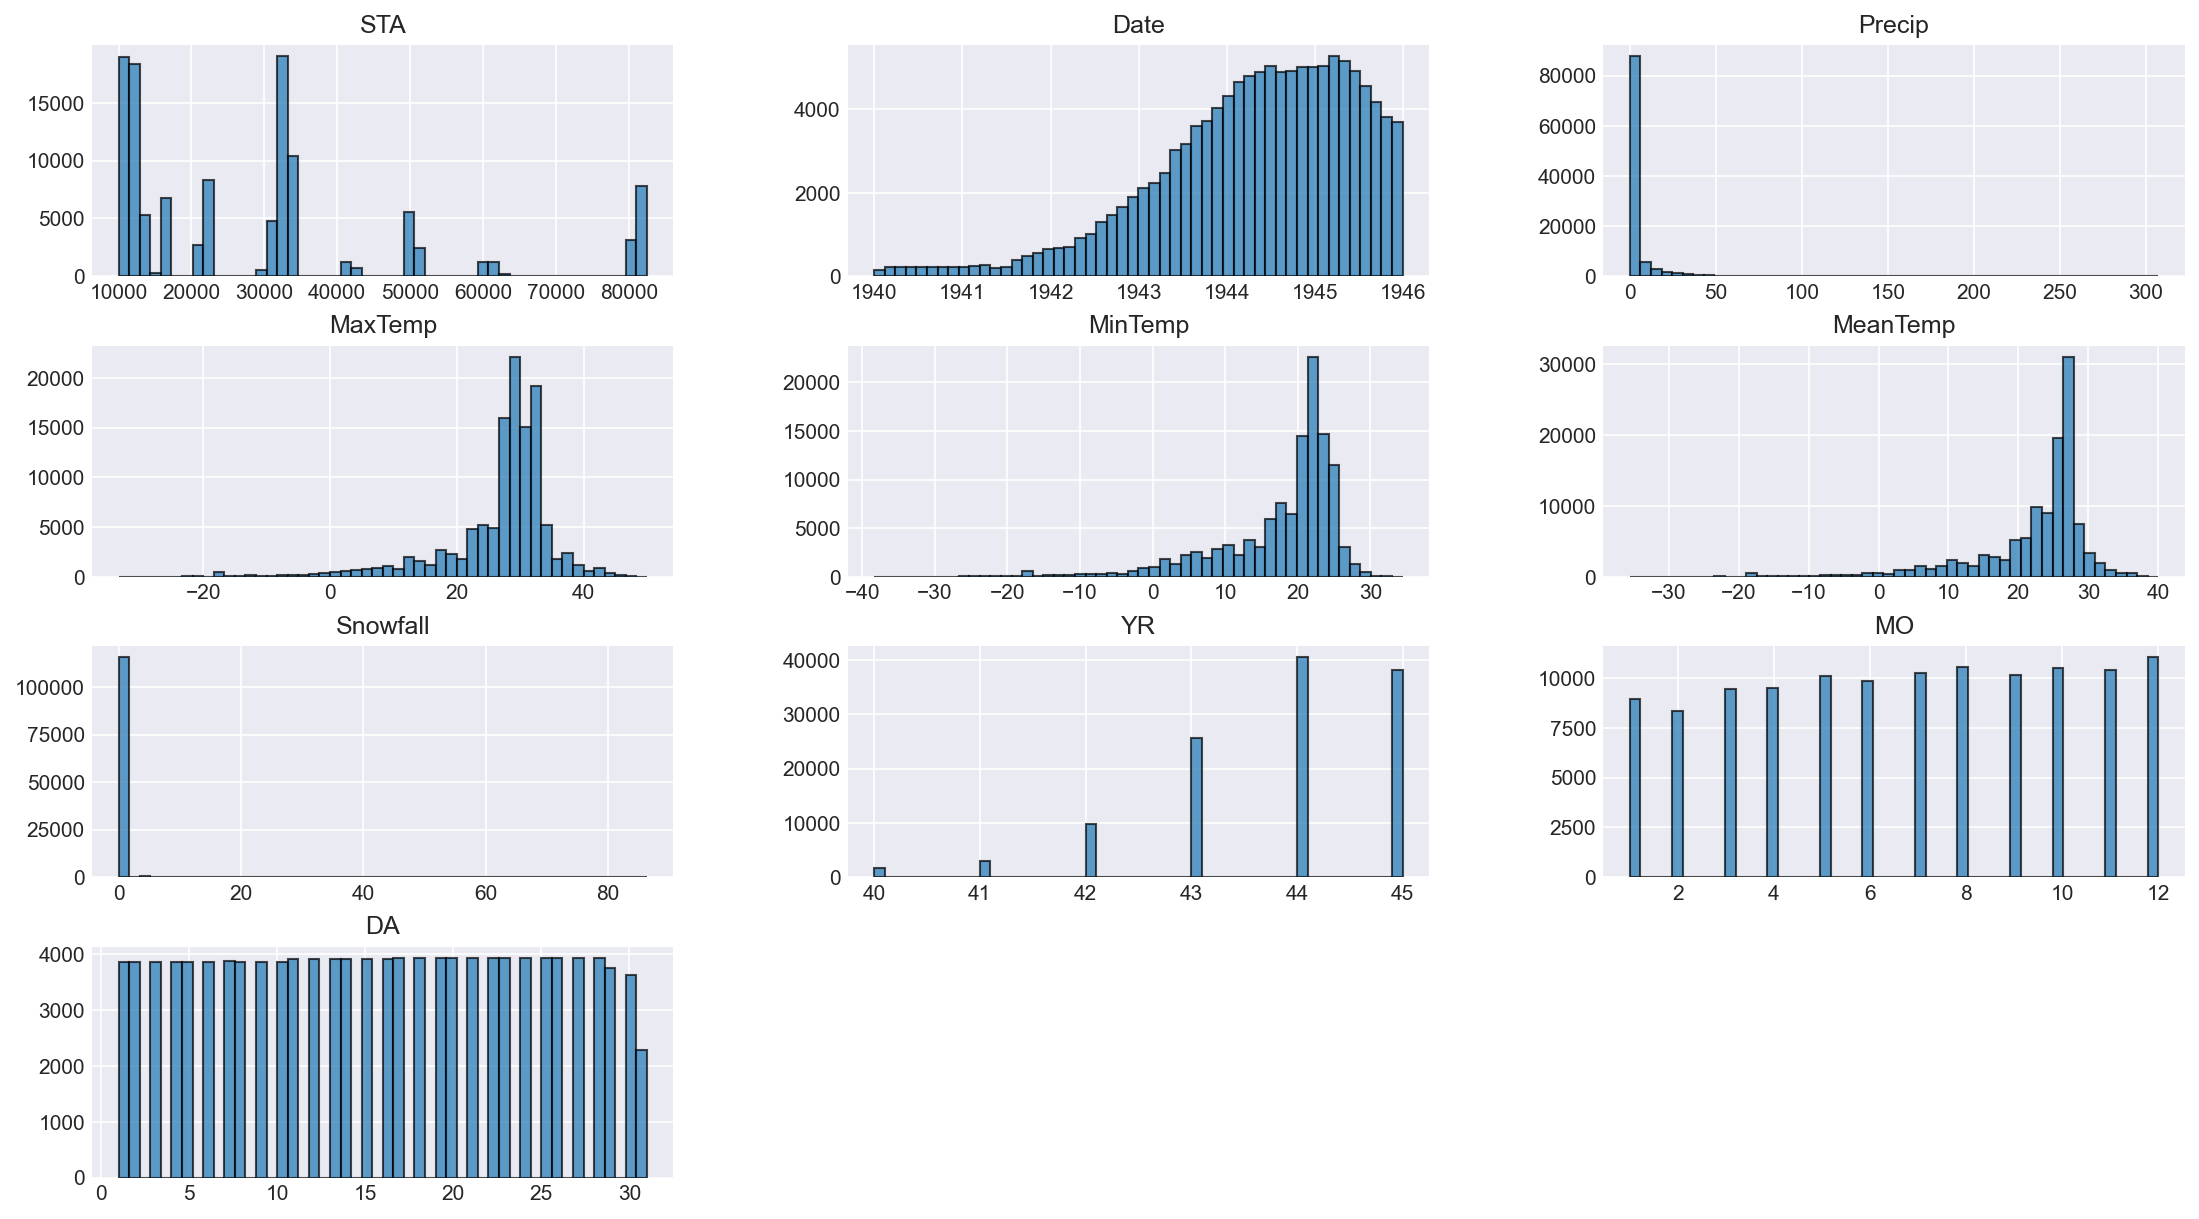

In [130]:
fig, ax=plt.subplots(figsize=(18,10), dpi=150)
df.hist(ax=ax, bins=50, alpha=0.7, edgecolor='black')
plt.show()

### **Imputing missing values**
    Distribution for Precip and Snowfall is heavily right skewed.
    Lets impute the missing values in each feature with its corresponding median

In [131]:
columns_to_impute=['Snowfall', 'Precip']

for col in columns_to_impute:
    df.replace( to_replace={ col: { np.nan: df[col].median() } }, inplace=True )

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 9.1 MB


### Now the data is clean and hence we can run analysis on our data

In [133]:
df.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,3.225612,27.045111,17.789511,22.411631,0.243054,43.805284,6.726016,15.797530
std,20953.209402,10.801044,8.717817,8.334572,8.297982,2.613366,1.136718,3.425561,8.794541
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,0.000000,43.000000,4.000000,8.000000
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000
75%,33501.000000,0.762000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000


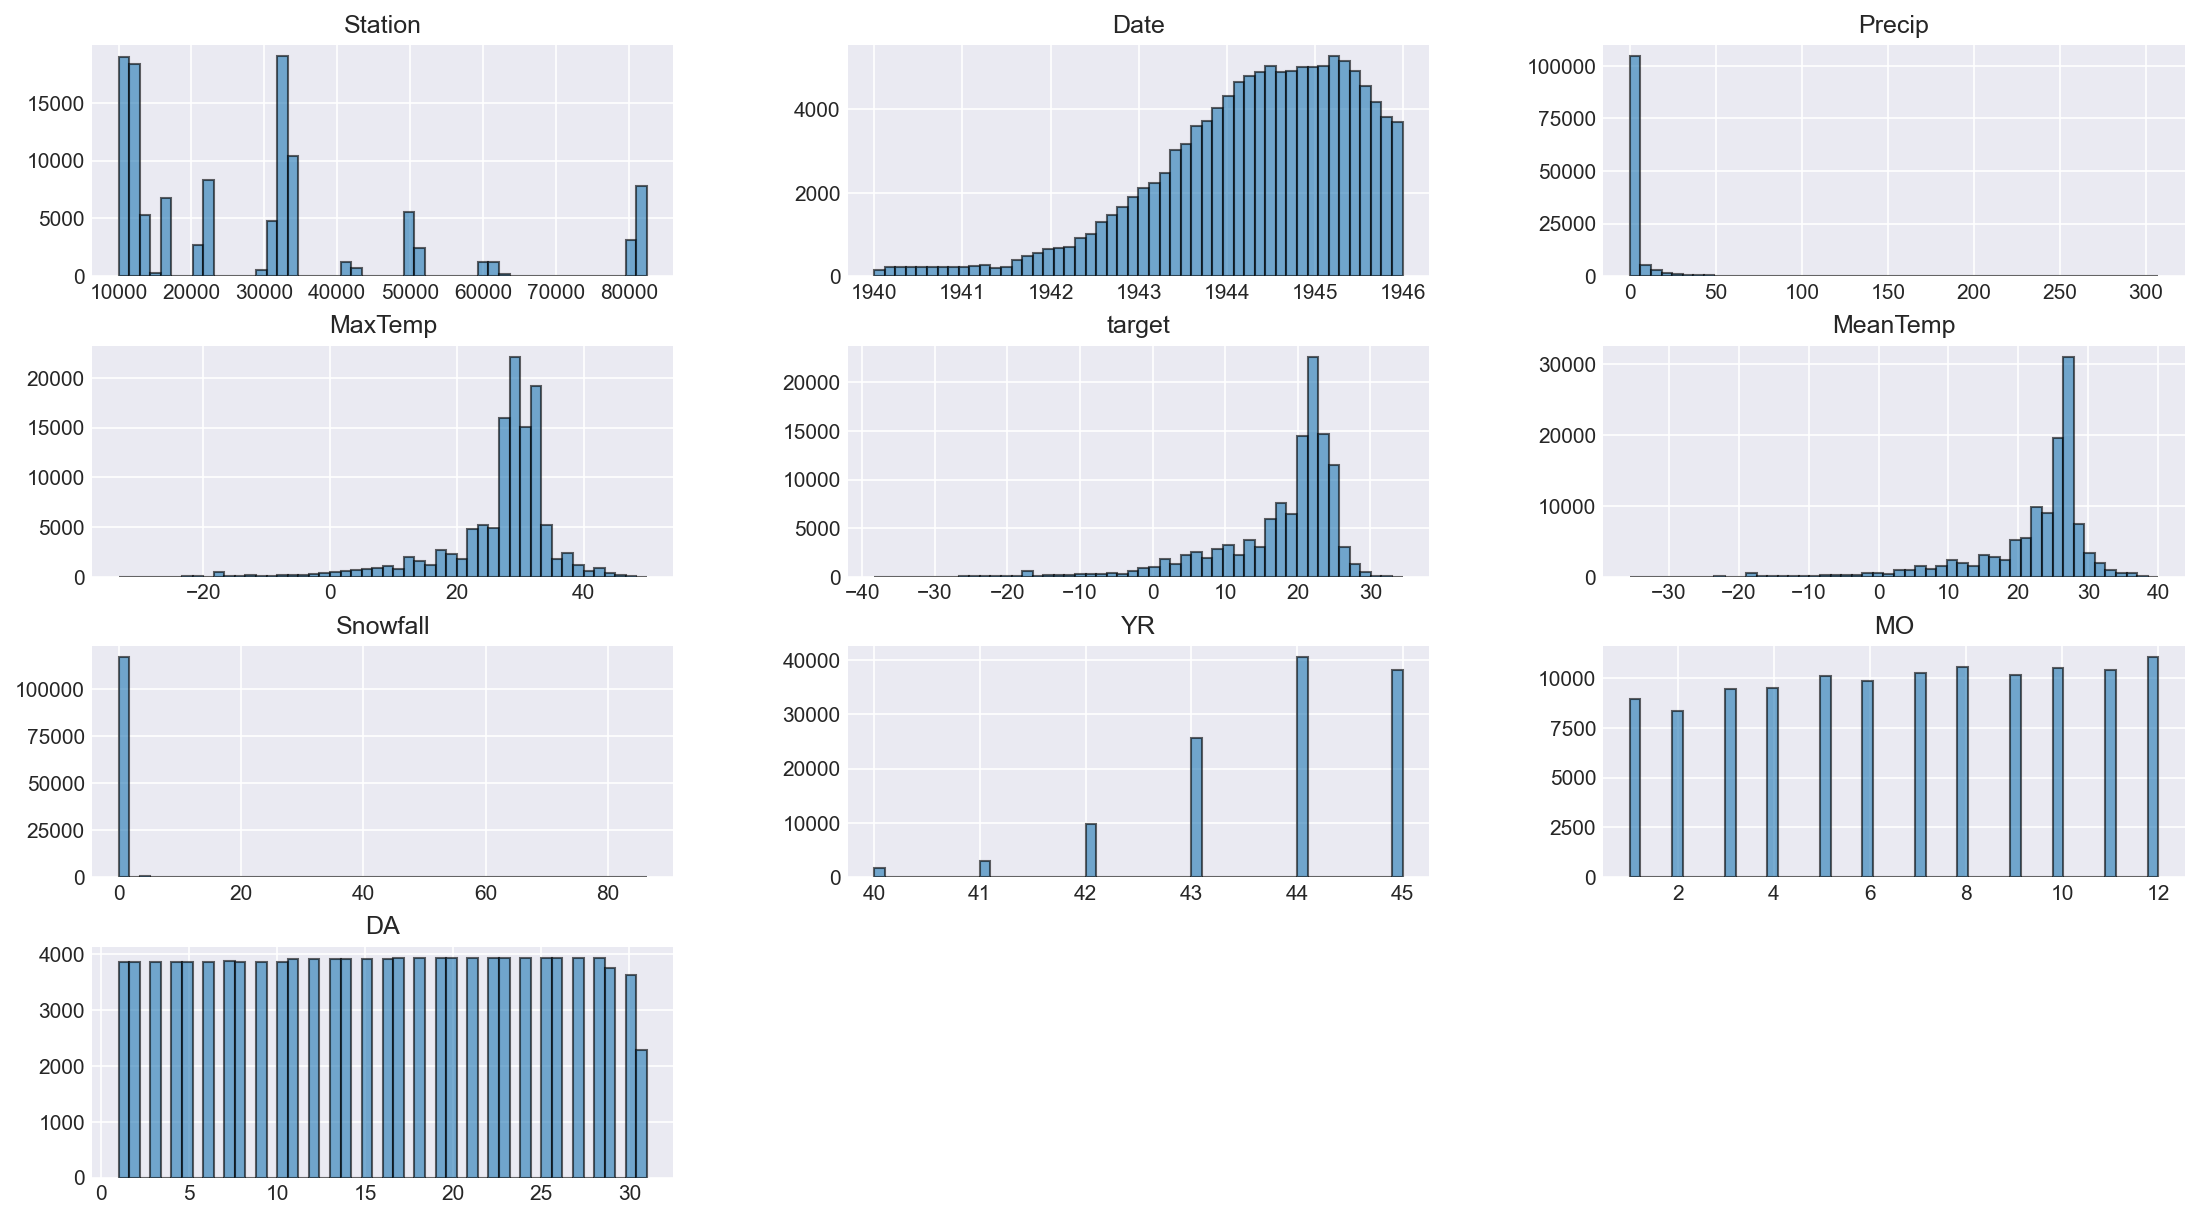

In [138]:
fig, ax=plt.subplots(figsize=(18,10), dpi=150)
df.hist(ax=ax, bins=50, alpha=0.6, edgecolor='black')
plt.show()

### *seems like all values are numerical*
### *There are discrete features like YR, MO, DA, Date*

### ***Target(MinTemp) is numerical, looks like a Regression problem***

### Renaming outcome to target and STA to station

In [135]:
df.rename(columns={'MinTemp':'target', 'STA':'Station'}, inplace=True)

In [136]:
df.head()

,Station,Date,Precip,MaxTemp,target,MeanTemp,Snowfall,YR,MO,DA
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5


### Lets convert the YR feature to full value

In [143]:
df.YR=df.Date.dt.year
df.YR

0         1942
1         1942
2         1942
3         1942
4         1942
          ... 
119035    1945
119036    1945
119037    1945
119038    1945
119039    1945
Name: YR, Length: 119040, dtype: int64

# **EDA**

In [33]:
##################################
'''IMPORTING FROM CUSTOM MODULE'''
##################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation

## **UNIVARIATE ANALYSIS**

### analysing numerical features  

In [40]:
#Extracting numerical column names
cols_num=list(df.columns)
cols_num.remove('Date')

				ANALYSIS OF: station 

5 point summary for: station
     station
min  10001.0
25%  11801.0
50%  22508.0
75%  33501.0
max  82506.0
---------------------------------
OUTLIERS in station via Z score

Outlier limits:
lower limit: -33199.92838207404 
upper limit: 92518.79997145575

Total outliers: 0
---------------------------------
OUTLIERS in station via IQR

Outlier limits:
lower limit: -20749.0 
upper limit: 66051.0

Total outliers: 10885
108155    80411
108156    80411
108157    80411
108158    80411
108159    80411
          ...  
119035    82506
119036    82506
119037    82506
119038    82506
119039    82506
Name: station, Length: 10885, dtype: int64
---------------------------------


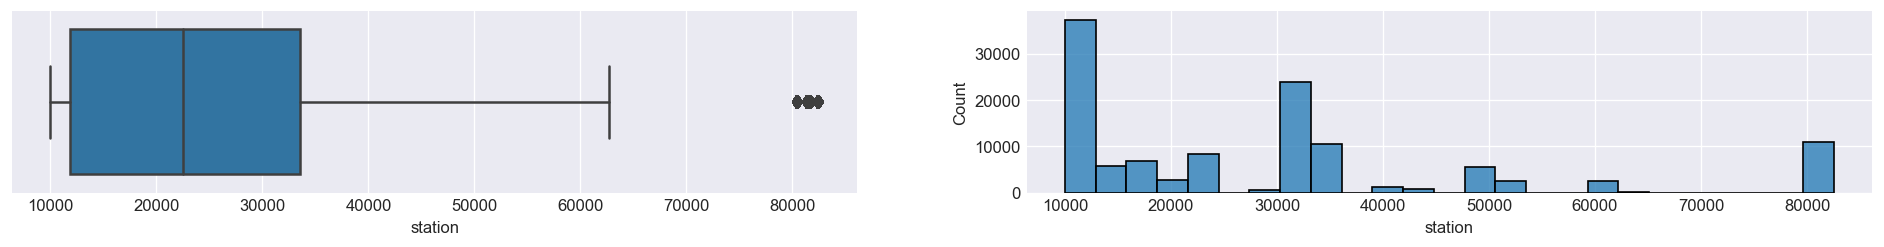

___________________________________________________________________________________________________________
				ANALYSIS OF: Precip 

5 point summary for: Precip
      Precip
min    0.000
25%    0.000
50%    0.000
75%    0.762
max  307.340
---------------------------------
OUTLIERS in Precip via Z score

Outlier limits:
lower limit: -29.177384441108185 
upper limit: 35.628608903473776

Total outliers: 2497
        outliers   Z-score
108       40.132  3.416942
257       47.752  4.122432
305       45.212  3.887269
327       57.658  5.039570
332       58.166  5.086602
...          ...       ...
118896    58.166  5.086602
118897    52.578  4.569243
118963    49.022  4.240014
118997    44.450  3.816720
119012    36.068  3.040681

[2497 rows x 2 columns]
---------------------------------
OUTLIERS in Precip via IQR

Outlier limits:
lower limit: -1.143 
upper limit: 1.905

Total outliers: 24398
2          2.540
3          2.540
7          3.556
9          3.556
89         3.302
           ... 

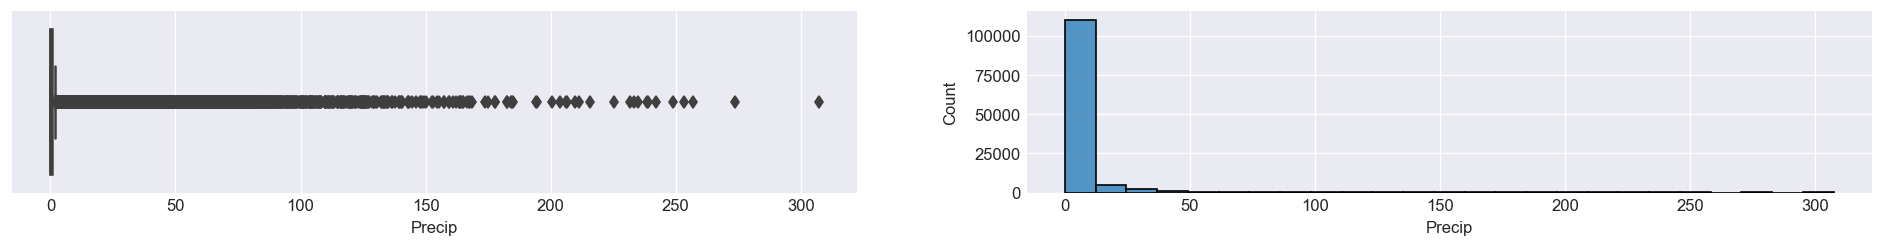

___________________________________________________________________________________________________________
				ANALYSIS OF: MaxTemp 

5 point summary for: MaxTemp
       MaxTemp
min -33.333333
25%  25.555556
50%  29.444444
75%  31.666667
max  50.000000
---------------------------------
OUTLIERS in MaxTemp via Z score

Outlier limits:
lower limit: 0.891770793190382 
upper limit: 53.198450980983985

Total outliers: 2459
         outliers   Z-score
10116  -17.777778 -5.141548
10117  -17.777778 -5.141548
10118  -17.777778 -5.141548
10119  -17.777778 -5.141548
10120  -17.777778 -5.141548
...           ...       ...
111271 -17.777778 -5.141548
111272 -17.777778 -5.141548
111273 -17.777778 -5.141548
111278 -17.777778 -5.141548
111279 -17.777778 -5.141548

[2459 rows x 2 columns]
---------------------------------
OUTLIERS in MaxTemp via IQR

Outlier limits:
lower limit: 16.388888894999994 
upper limit: 40.833333335000006

Total outliers: 14101
10116    -17.777778
10117    -17.777778
10118    

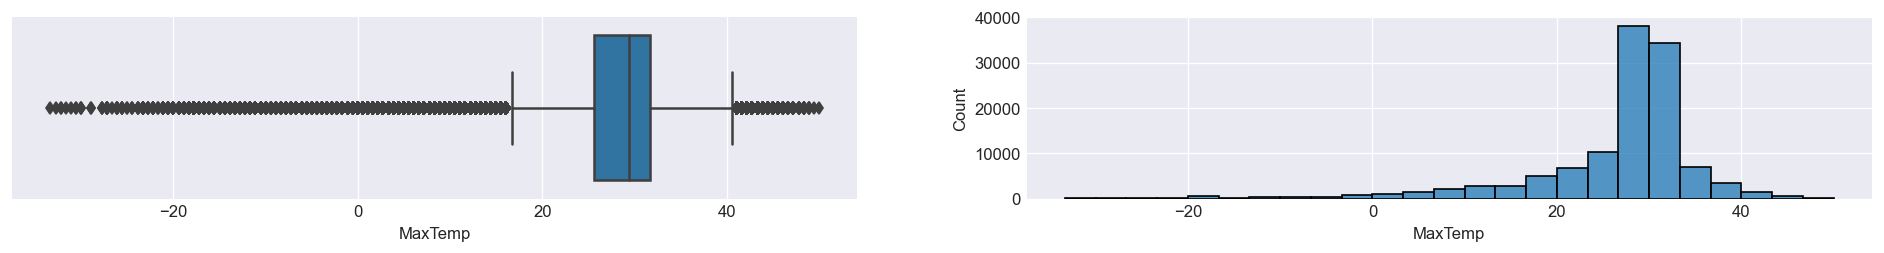

___________________________________________________________________________________________________________
				ANALYSIS OF: target 

5 point summary for: target
        target
min -38.333333
25%  15.000000
50%  21.111111
75%  23.333333
max  34.444444
---------------------------------
OUTLIERS in target via Z score

Outlier limits:
lower limit: -7.214099998172319 
upper limit: 42.79312105536134

Total outliers: 2245
         outliers   Z-score
10116  -17.777778 -4.267458
10117  -17.777778 -4.267458
10118  -17.777778 -4.267458
10119  -17.777778 -4.267458
10120  -17.777778 -4.267458
...           ...       ...
111273 -17.777778 -4.267458
111278 -17.777778 -4.267458
111279 -17.777778 -4.267458
113916 -17.777778 -4.267458
117865 -17.777778 -4.267458

[2245 rows x 2 columns]
---------------------------------
OUTLIERS in target via IQR

Outlier limits:
lower limit: 2.500000005000002 
upper limit: 35.833333325

Total outliers: 7352
10116    -17.777778
10117    -17.777778
10118    -17.777778
1

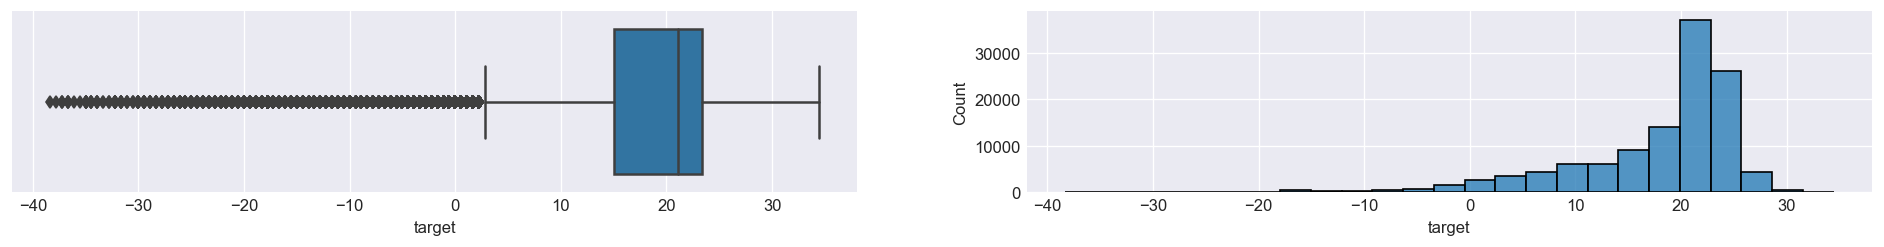

___________________________________________________________________________________________________________
				ANALYSIS OF: MeanTemp 

5 point summary for: MeanTemp
      MeanTemp
min -35.555556
25%  20.555556
50%  25.555556
75%  27.222222
max  40.000000
---------------------------------
OUTLIERS in MeanTemp via Z score

Outlier limits:
lower limit: -2.482211008640551 
upper limit: 47.30547303168309

Total outliers: 2436
         outliers   Z-score
10116  -17.777778 -4.843295
10117  -17.777778 -4.843295
10118  -17.777778 -4.843295
10119  -17.777778 -4.843295
10120  -17.777778 -4.843295
...           ...       ...
111273 -17.777778 -4.843295
111278 -17.777778 -4.843295
111279 -17.777778 -4.843295
112375 -17.777778 -4.843295
117865 -17.777778 -4.843295

[2436 rows x 2 columns]
---------------------------------
OUTLIERS in MeanTemp via IQR

Outlier limits:
lower limit: 10.555555569999997 
upper limit: 37.22222221

Total outliers: 11443
10116    -17.777778
10117    -17.777778
10118    -17

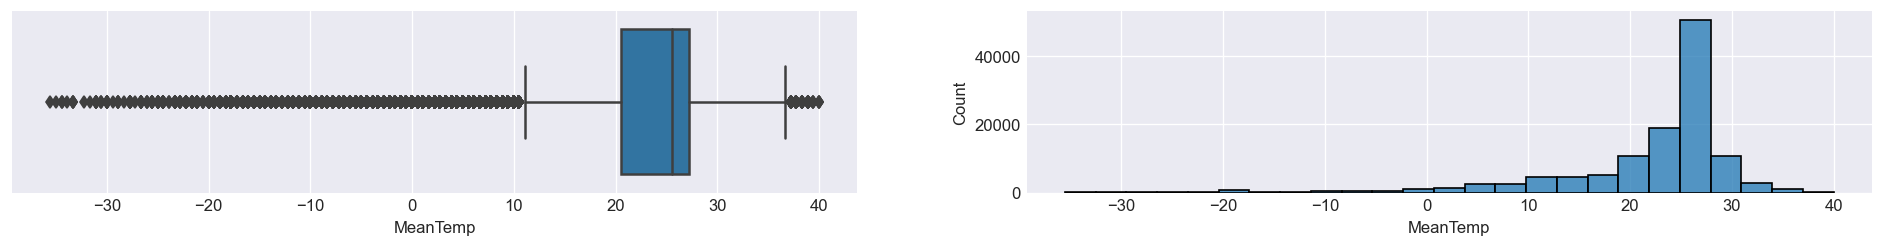

___________________________________________________________________________________________________________
				ANALYSIS OF: Snowfall 

5 point summary for: Snowfall
     Snowfall
min      0.00
25%      0.00
50%      0.00
75%      0.00
max     86.36
---------------------------------
OUTLIERS in Snowfall via Z score

Outlier limits:
lower limit: -7.597010206585799 
upper limit: 8.083118069489025

Total outliers: 940
       outliers    Z-score
42900     22.86   8.654373
42903     33.02  12.542096
42904     30.48  11.570165
42907     30.48  11.570165
43353     10.16   3.794719
...         ...        ...
91152     10.16   3.794719
91153     10.16   3.794719
91154     10.16   3.794719
91159     12.70   4.766650
97179     15.24   5.738580

[940 rows x 2 columns]
---------------------------------
OUTLIERS in Snowfall via IQR

Outlier limits:
lower limit: 0.0 
upper limit: 0.0

Total outliers: 2143
42900     22.86
42903     33.02
42904     30.48
42907     30.48
42935      2.54
          ...  


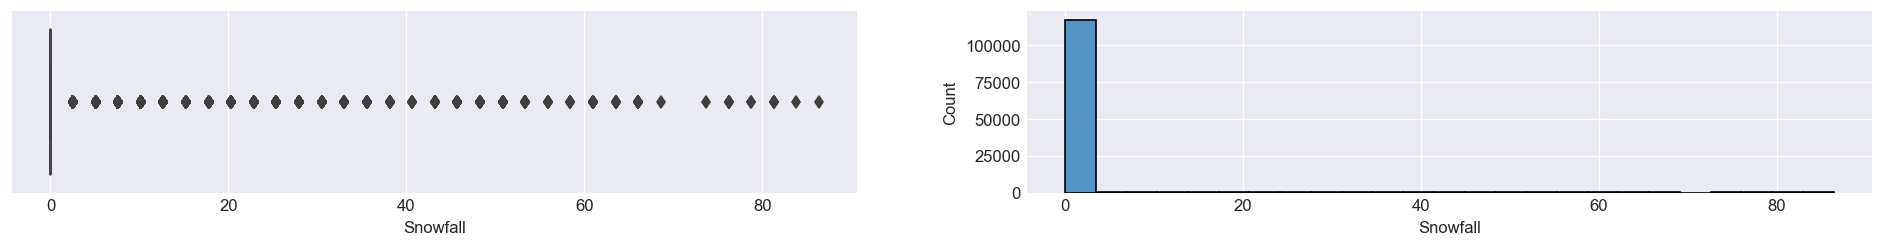

___________________________________________________________________________________________________________
				ANALYSIS OF: YR 

5 point summary for: YR
       YR
min  40.0
25%  43.0
50%  44.0
75%  45.0
max  45.0
---------------------------------
OUTLIERS in YR via Z score

Outlier limits:
lower limit: 40.39514344315091 
upper limit: 47.215424433193185

Total outliers: 1765
       outliers   Z-score
6289         40 -3.347619
6290         40 -3.347619
6291         40 -3.347619
6292         40 -3.347619
6293         40 -3.347619
...         ...       ...
60367        40 -3.347619
60368        40 -3.347619
60369        40 -3.347619
60370        40 -3.347619
60371        40 -3.347619

[1765 rows x 2 columns]
---------------------------------
OUTLIERS in YR via IQR

Outlier limits:
lower limit: 40.0 
upper limit: 48.0

Total outliers: 0
---------------------------------


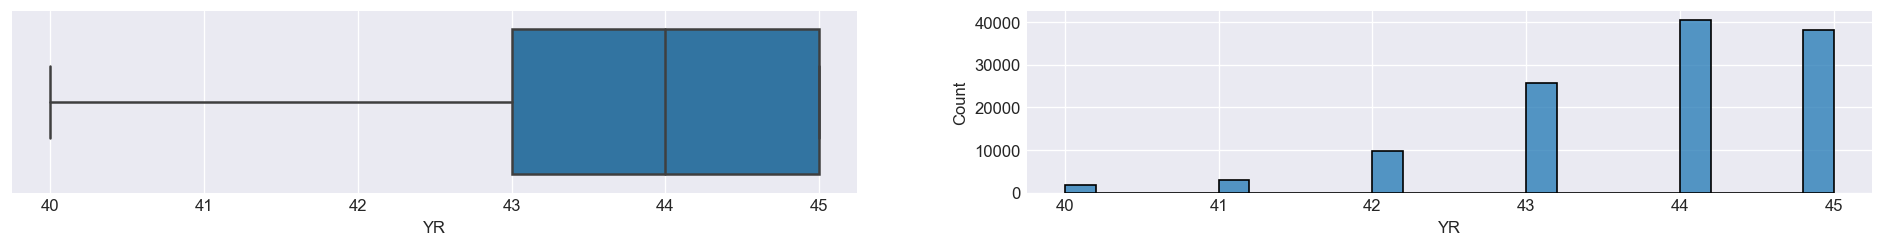

___________________________________________________________________________________________________________
				ANALYSIS OF: MO 

5 point summary for: MO
       MO
min   1.0
25%   4.0
50%   7.0
75%  10.0
max  12.0
---------------------------------
OUTLIERS in MO via Z score

Outlier limits:
lower limit: -3.5506221603468733 
upper limit: 17.0026550904544

Total outliers: 0
---------------------------------
OUTLIERS in MO via IQR

Outlier limits:
lower limit: -5.0 
upper limit: 19.0

Total outliers: 0
---------------------------------


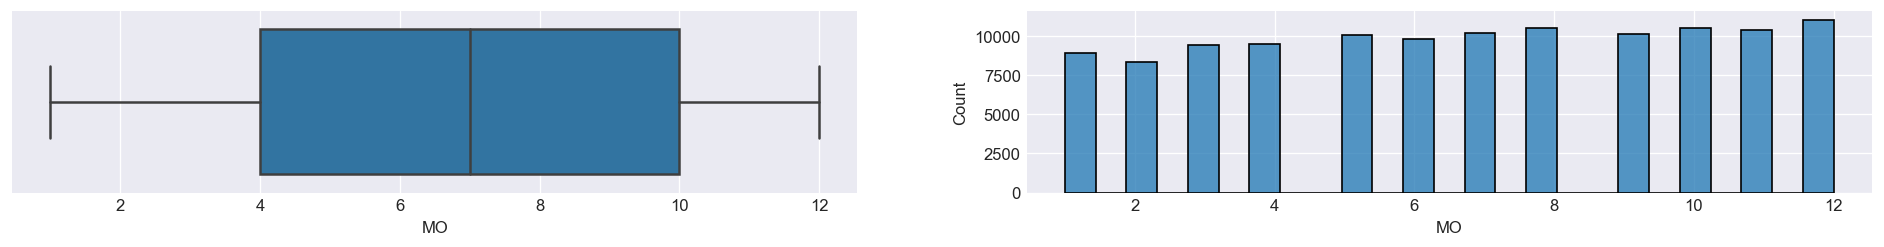

___________________________________________________________________________________________________________
				ANALYSIS OF: DA 

5 point summary for: DA
       DA
min   1.0
25%   8.0
50%  16.0
75%  23.0
max  31.0
---------------------------------
OUTLIERS in DA via Z score

Outlier limits:
lower limit: -10.58598114160171 
upper limit: 42.18104162547267

Total outliers: 0
---------------------------------
OUTLIERS in DA via IQR

Outlier limits:
lower limit: -14.5 
upper limit: 45.5

Total outliers: 0
---------------------------------


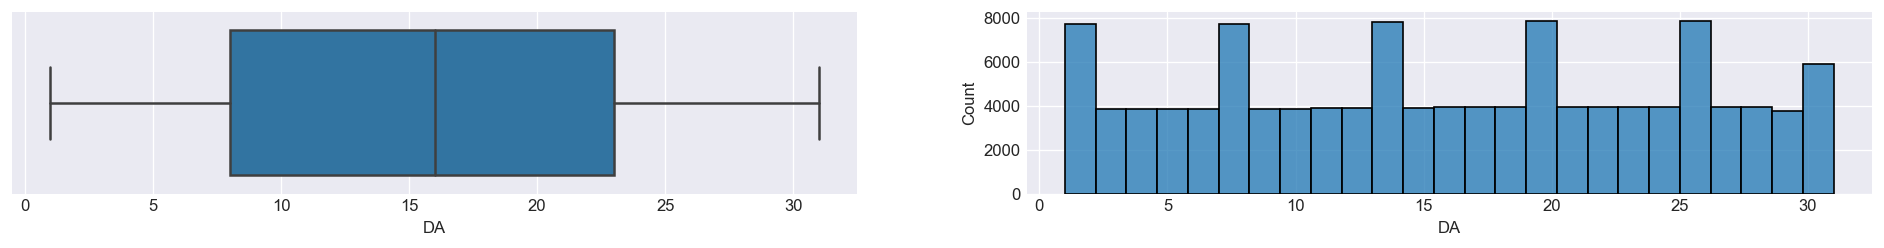

___________________________________________________________________________________________________________


In [41]:
analysis_quant(df, cols_num, figsize=(20,2), dpi=120)

### ***distribution doesn't seem to be normal for most features***

    Some features like precip, snowfall mostly have values as '0' and heavily right skewed
    Station seems to be a discrete feature
    
    Snowfall seems to have uniformly spaced outliers (looks like values in inches were directly converted to mm)

## **BIVARIATE ANALYSIS**

### Correlation between features

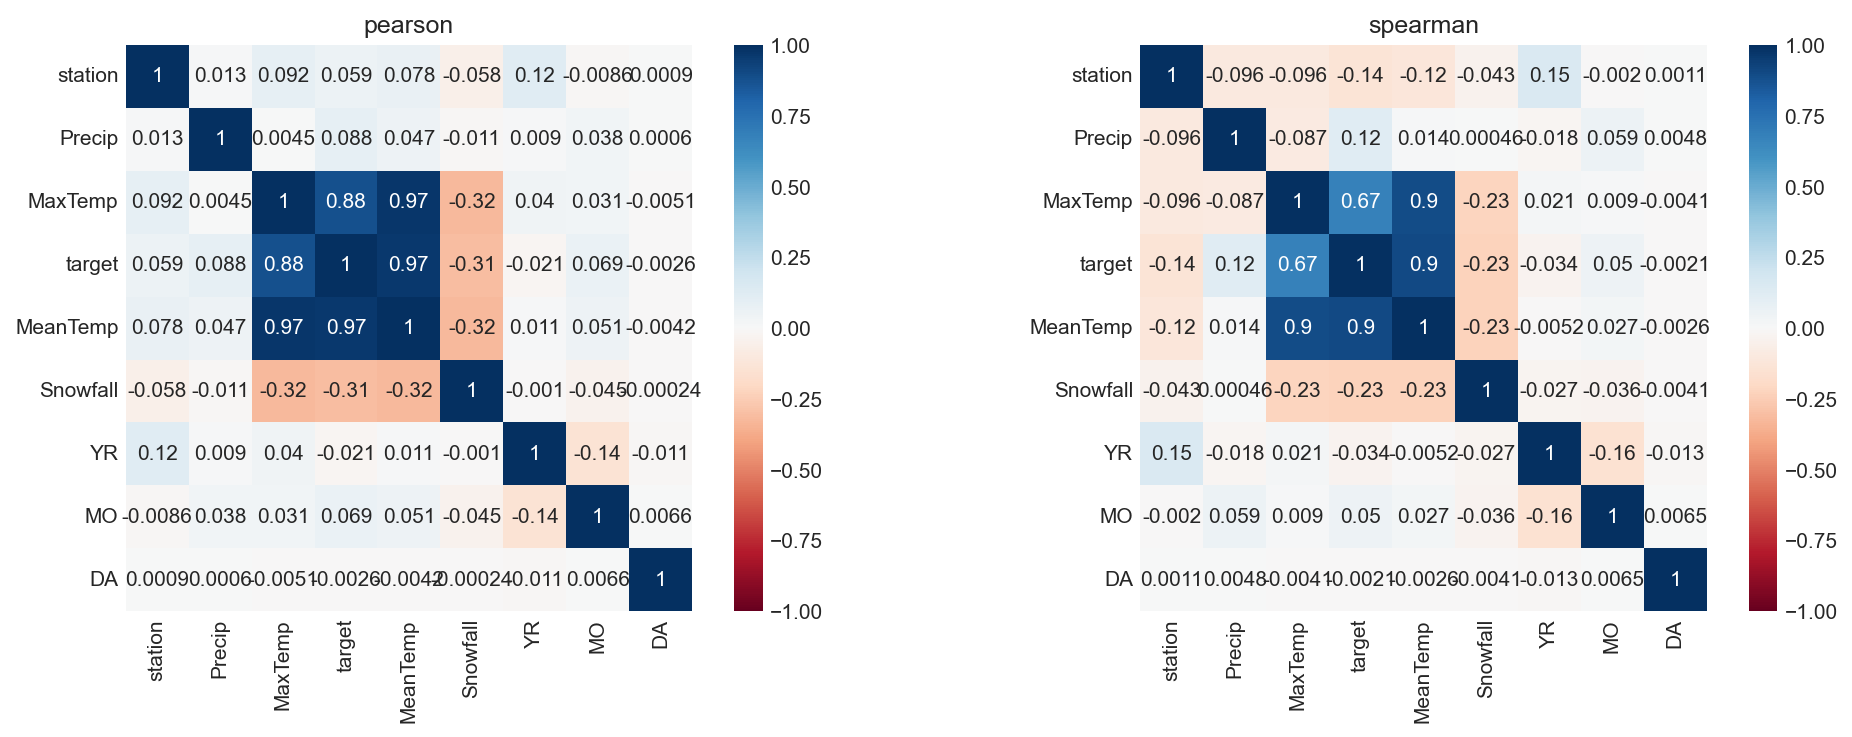

In [58]:
correlation(df, figsize=(16,5), dpi=150)

### ***MaxTemp, MeanTemp, target(MinTemp) all seem to be highly correlated to each other***

### analysing continuous features  

## **Multivariate analysis**